In [17]:
import nltk
nltk.download('stopwords')  # Downloads the stopwords corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Features shape: (10000, 1500)
Labels shape: (9962,)

Confusion Matrix:
[[ 60  14 209   1  10  19   6  13   0]
 [  0   1   0   0   0   0   0   0   0]
 [ 24   6  68   0   7   6  11  11   0]
 [  1   0   0   0   1   2   1   1   0]
 [ 26   9 119   3  40  12  23   6   5]
 [  3   0   2   0   1   0   3   0   1]
 [ 39  21 205   2  89  24  73  12  18]
 [  1   0  10   0   4   0   3   0   1]
 [ 67  63 283  33  83  54  77  23  83]]


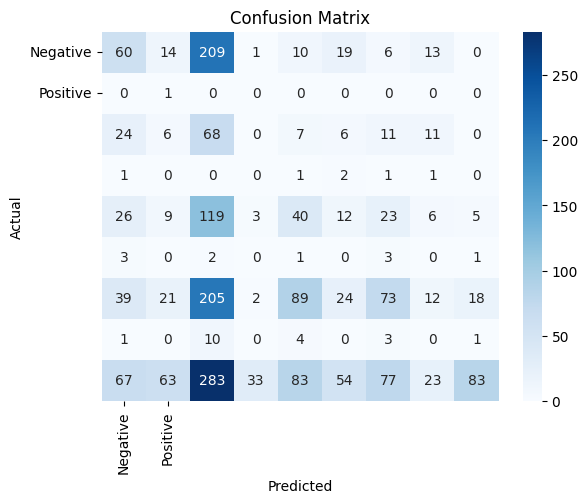

In [22]:
# ------------------------------ Importing Required Libraries ------------------------------

import numpy as np  # For handling numerical computations and arrays
import pandas as pd  # For loading, manipulating, and working with datasets in tabular form
import re  # For text manipulation using regular expressions
import nltk  # Natural Language Toolkit (NLTK) for text processing
from nltk.corpus import stopwords  # For removing common words (stopwords) in text
from nltk.stem.porter import PorterStemmer  # For stemming words (reducing words to their root form)
from sklearn.feature_extraction.text import CountVectorizer  # For converting text into numerical features
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.naive_bayes import GaussianNB  # For building the Naive Bayes classifier
from sklearn.metrics import confusion_matrix  # For evaluating the model's performance

# ------------------------------ Loading and Inspecting the Dataset ------------------------------

# Load the dataset, ensure that the path is correct
dataset = pd.read_csv('Restaurant_reviews.csv', delimiter=',')  # Use ',' delimiter as the file is CSV

# Clean column names to avoid leading/trailing spaces or any other issues
dataset.columns = dataset.columns.str.strip()  # Strip any extra spaces from column names

# Checking the column names to ensure that the 'Review' column exists
print(dataset.columns)  # This will output all column names

# ------------------------------ Text Cleaning and Preprocessing ------------------------------

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')

# Creating an empty list to hold the cleaned reviews
corpus = []

# Loop through each review in the dataset
for i in range(0, len(dataset['Review'])):
    review = dataset['Review'][i]

    # Ensure the review is a valid string (avoid non-string types like NaN or None)
    if isinstance(review, str):
        # Step 1: Remove any non-alphabet characters (only keep letters)
        review = re.sub('[^a-zA-Z]', ' ', review)

        # Step 2: Convert text to lowercase for uniformity
        review = review.lower()

        # Step 3: Split the review into individual words (tokens)
        review = review.split()

        # Step 4: Perform stemming (get root form of words) and remove stopwords
        ps = PorterStemmer()
        stopword_set = set(stopwords.words('english'))  # Set of stopwords for faster lookup
        review = [ps.stem(word) for word in review if word not in stopword_set]

        # Step 5: Join the words back into a single string
        review = ' '.join(review)

        # Step 6: Append the cleaned review to the corpus
        corpus.append(review)
    else:
        corpus.append('')  # Append an empty string if review is not valid

# ------------------------------ Handling Missing Data ------------------------------

# Ensure no NaN values in the corpus by checking for any empty reviews
corpus = [review if review != '' else 'no review' for review in corpus]

# ------------------------------ Creating the Bag of Words Model ------------------------------

# Initialize CountVectorizer to convert text into numerical features
cv = CountVectorizer(max_features=1500)  # Consider top 1500 most frequent words

# Convert the cleaned corpus into a matrix of token counts (Bag of Words model)
X = cv.fit_transform(corpus).toarray()

# Ensure there are no NaN values in the feature matrix X
X = np.nan_to_num(X)  # Replace NaN values with 0

# ------------------------------ Handling Missing Labels ------------------------------

# Check for missing or NaN values in the 'Rating' column and remove corresponding rows if needed
dataset = dataset.dropna(subset=['Rating'])

# The dependent variable 'y' is the sentiment (Rating column)
y = dataset['Rating'].values  # Assuming 'Rating' column is the sentiment (0 or 1)

# ------------------------------ Ensuring Consistent Number of Samples ------------------------------

# Check if the number of samples in X and y are the same
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Make sure that the feature matrix and labels have the same number of samples
min_samples = min(len(X), len(y))  # Find the minimum length between features and labels
X = X[:min_samples]
y = y[:min_samples]

# ------------------------------ Splitting the Dataset into Training and Test Sets ------------------------------

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# ------------------------------ Fitting Naive Bayes Classifier ------------------------------

# Initialize Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# ------------------------------ Making Predictions ------------------------------

# Predict the sentiment on the test set
y_pred = classifier.predict(X_test)

# ------------------------------ Evaluating the Model ------------------------------

# Create a confusion matrix to compare actual vs predicted values
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# ------------------------------ Optional: Visualizing the Confusion Matrix ------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
